Data Visualization
---

### Pie-Charts 

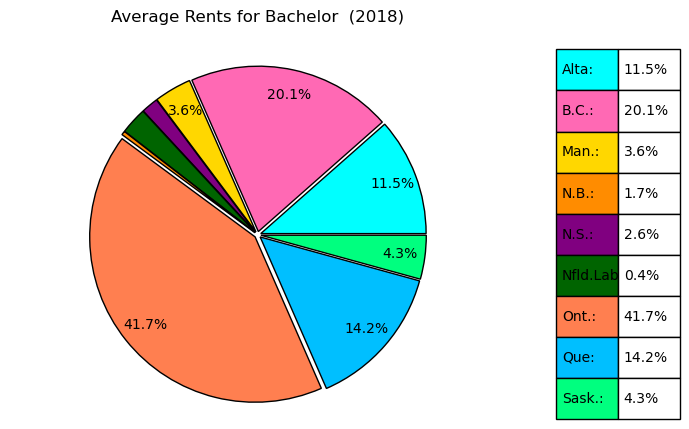

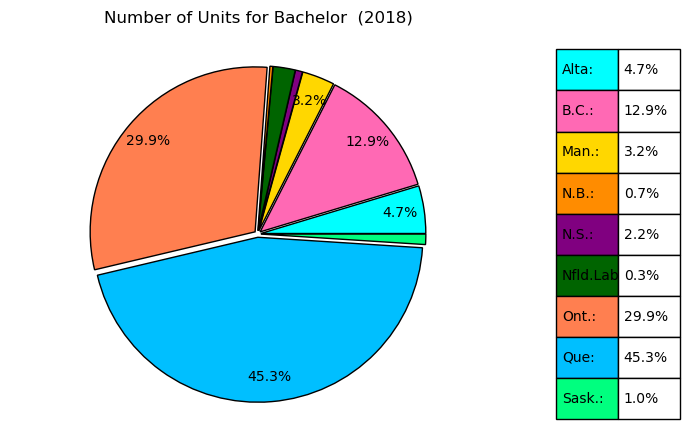

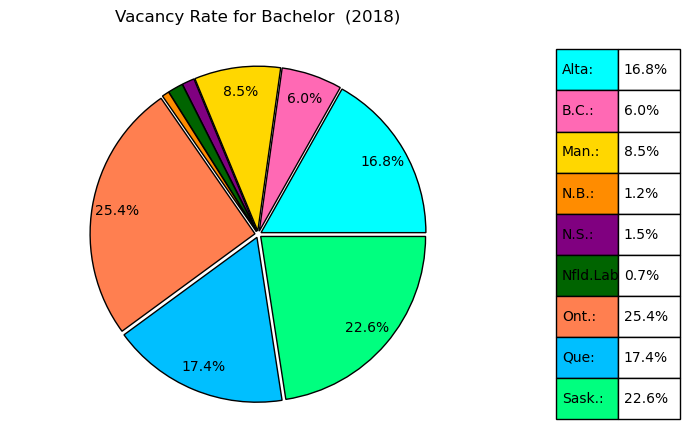

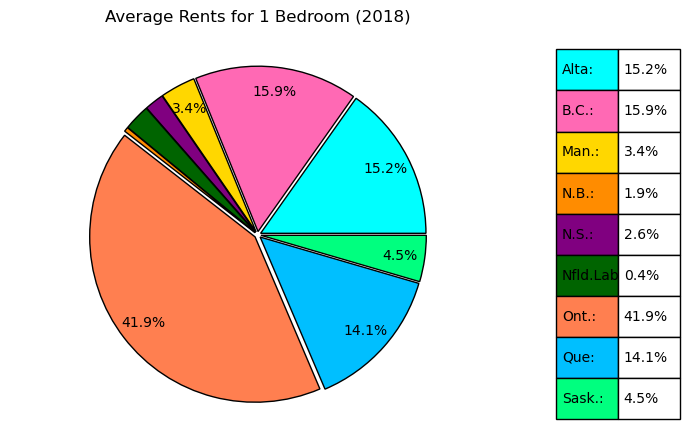

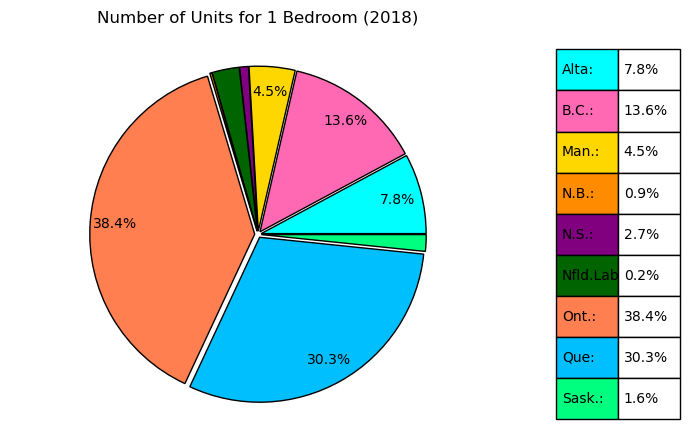

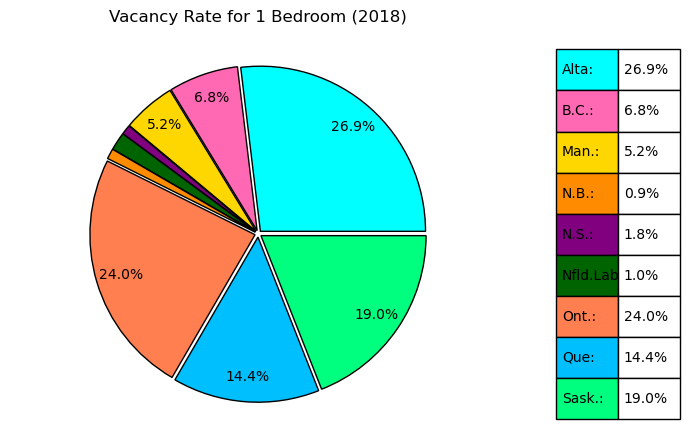

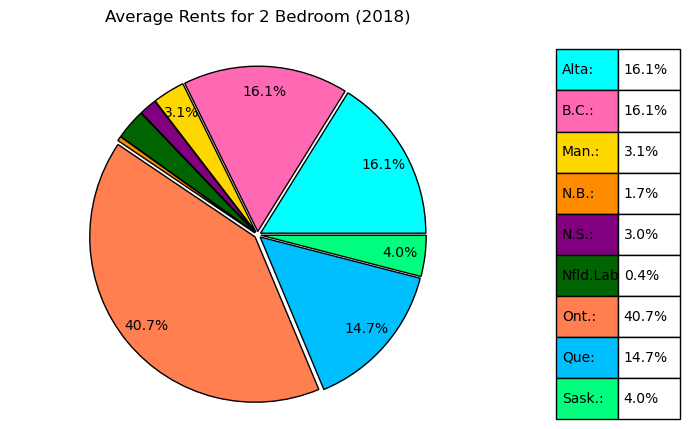

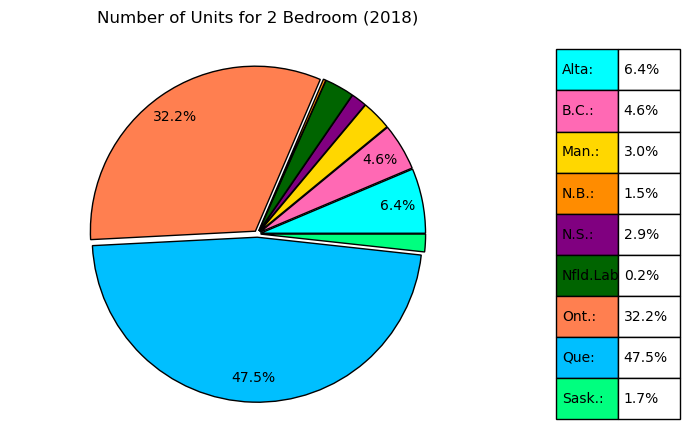

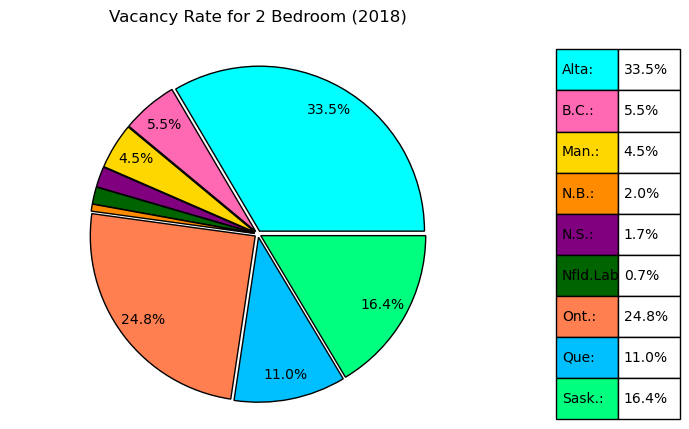

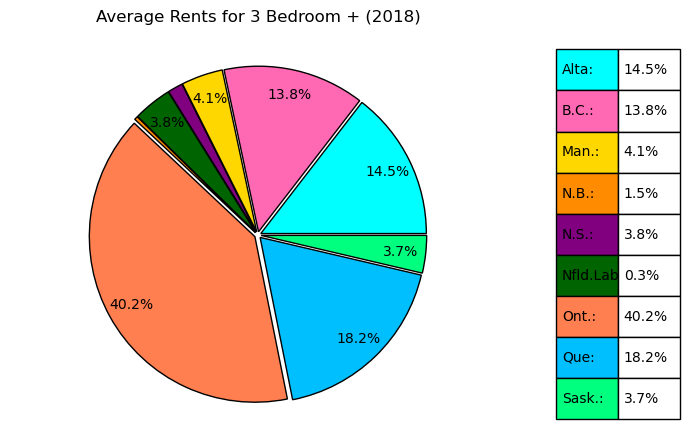

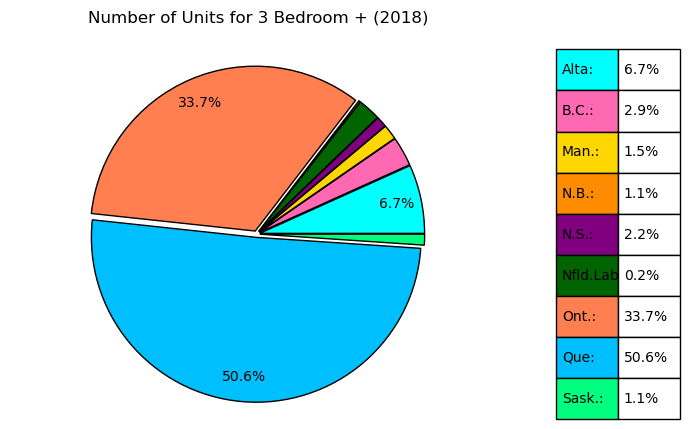

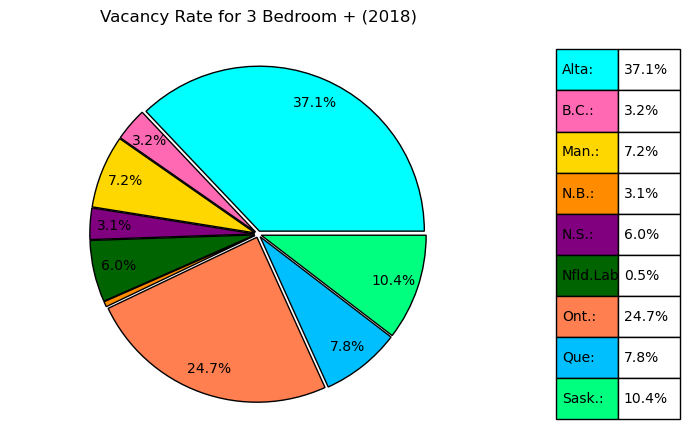

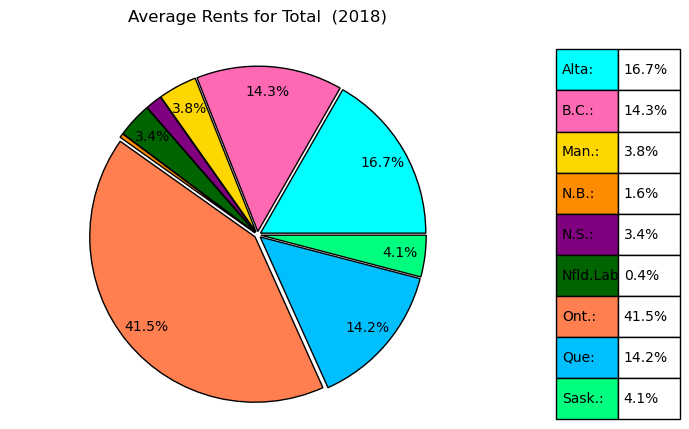

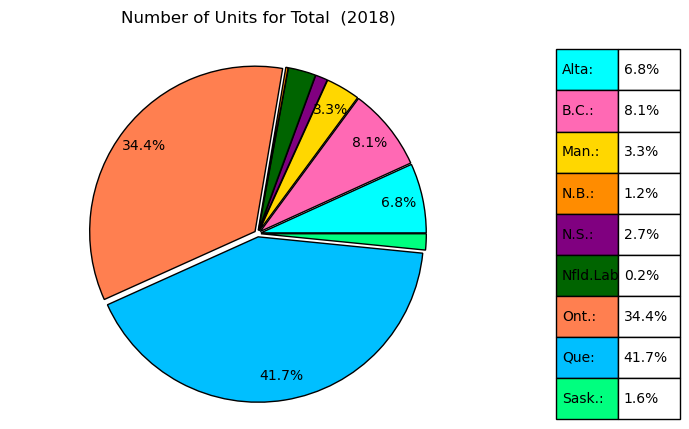

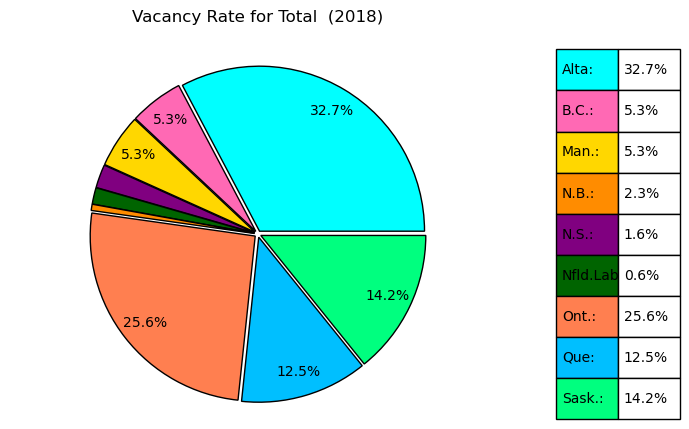

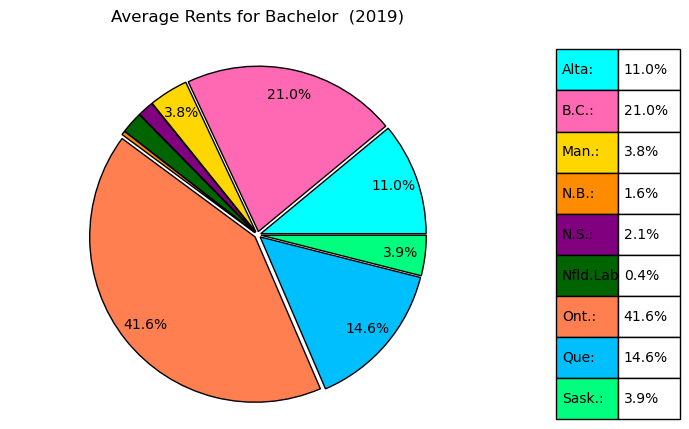

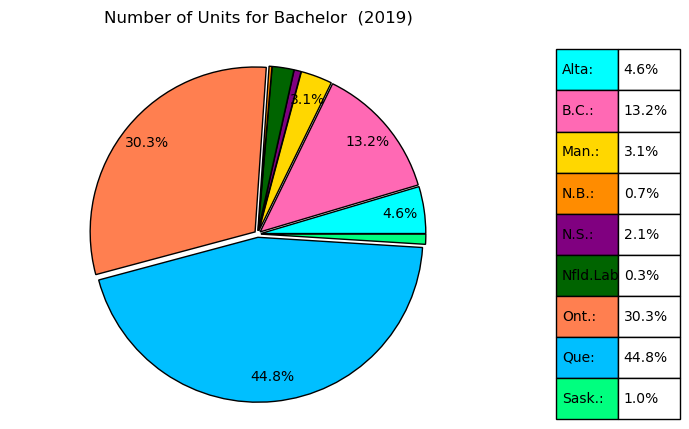

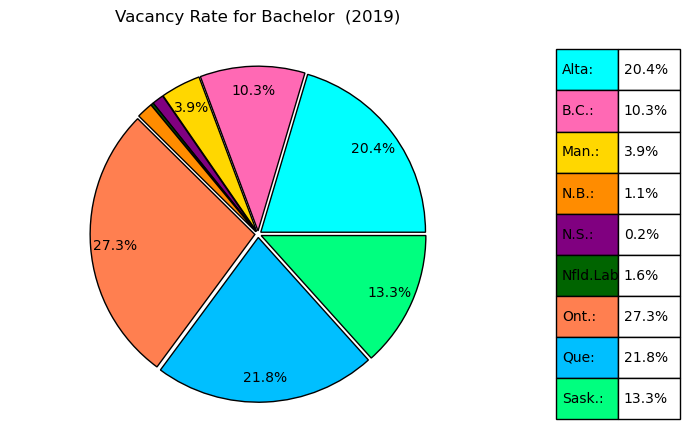

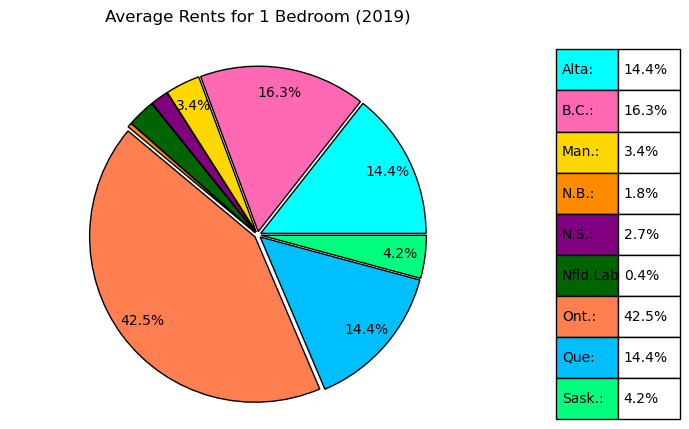

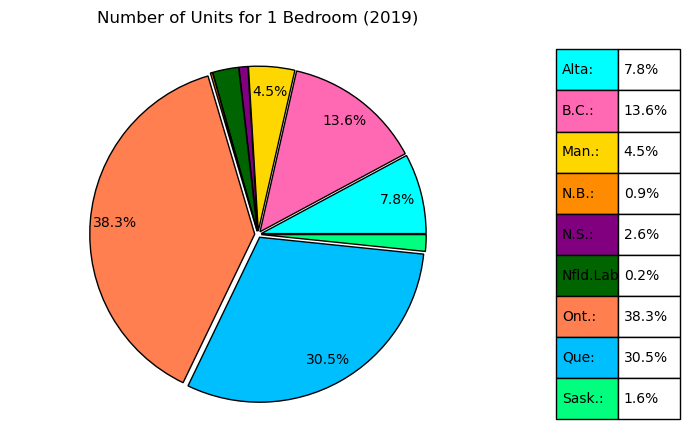

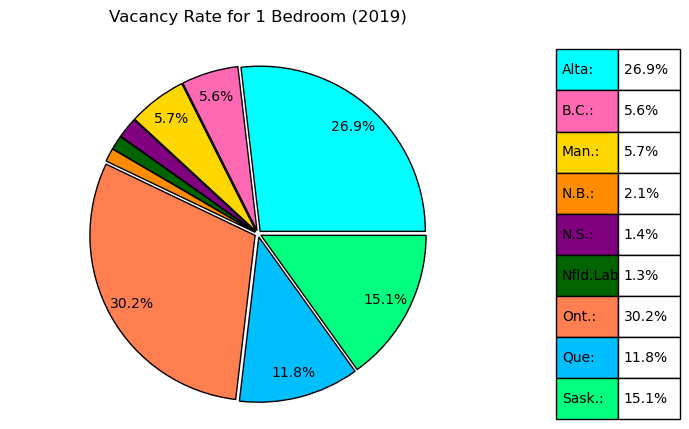

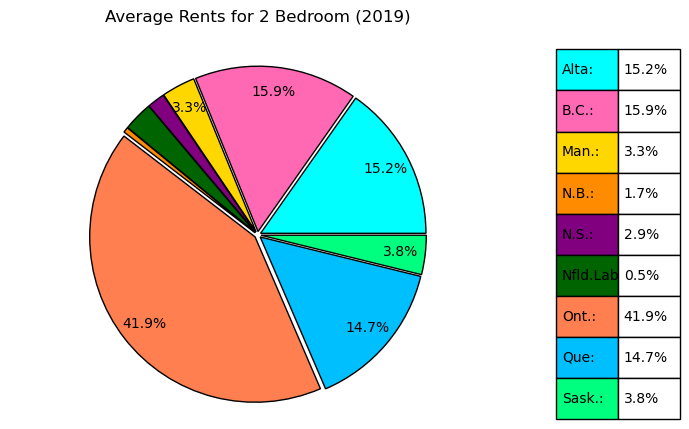

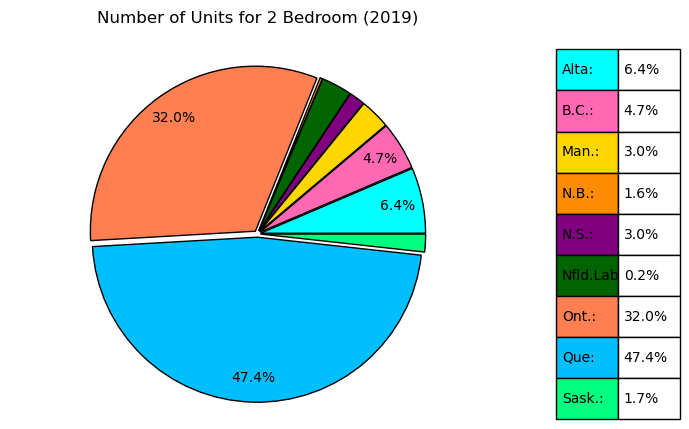

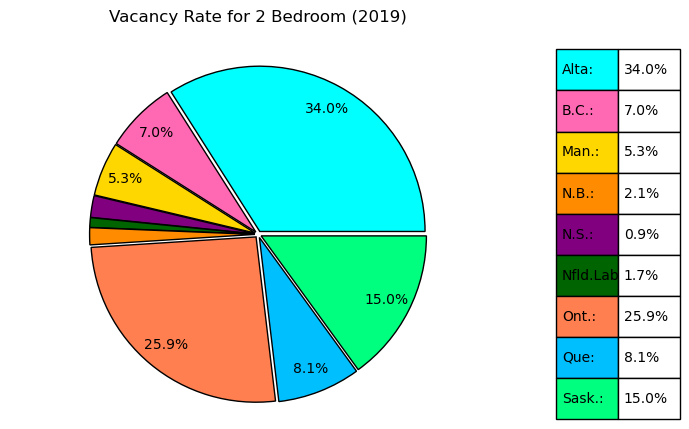

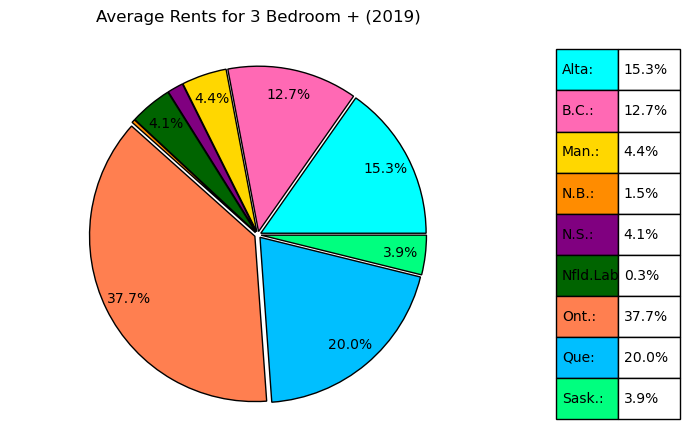

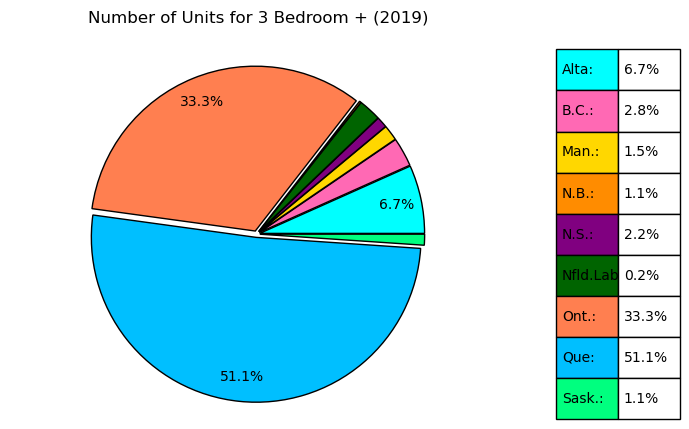

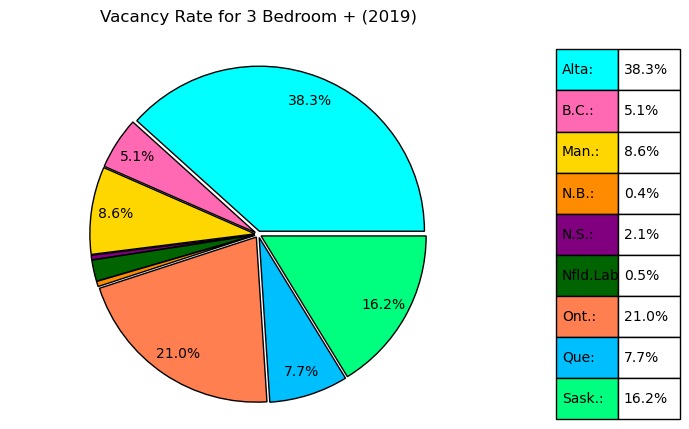

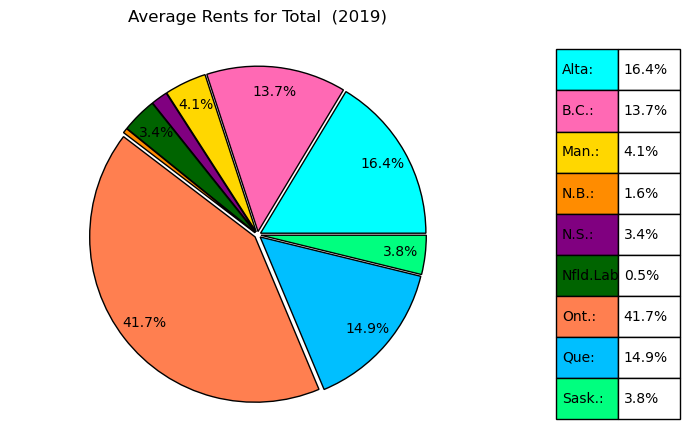

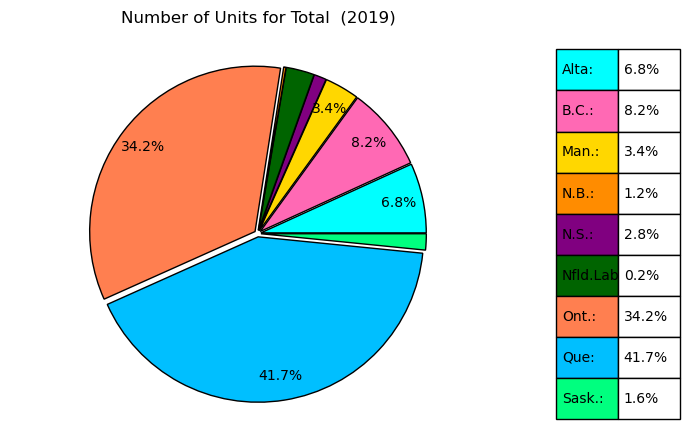

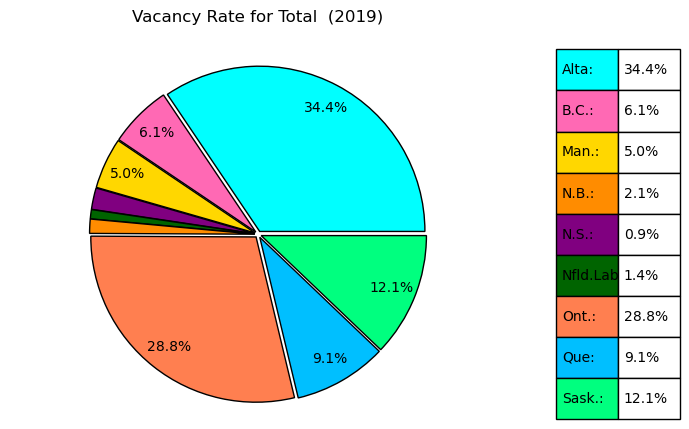

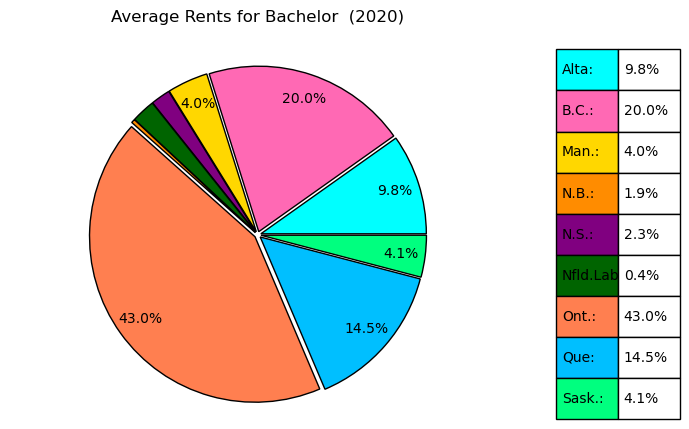

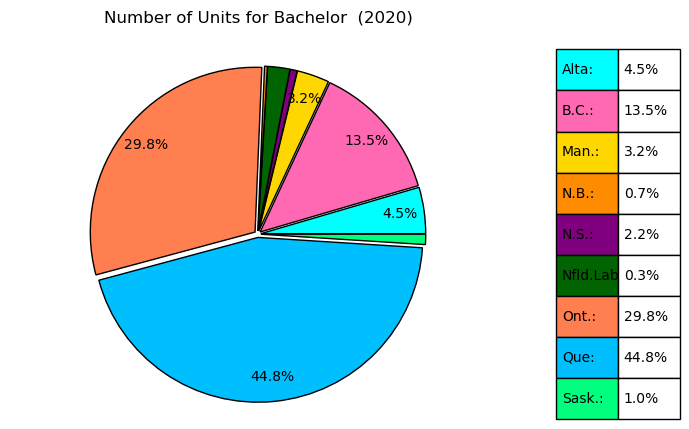

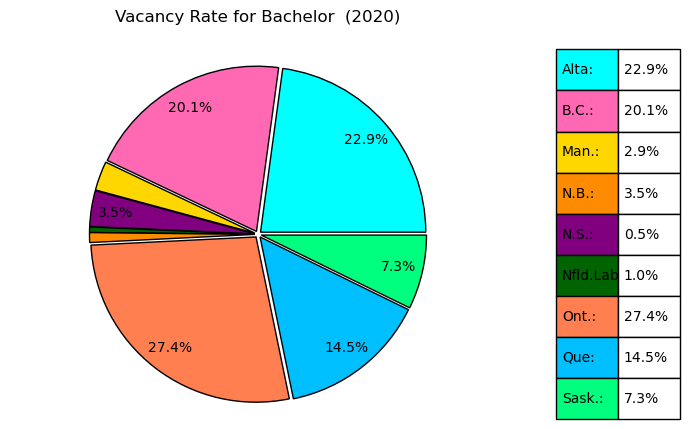

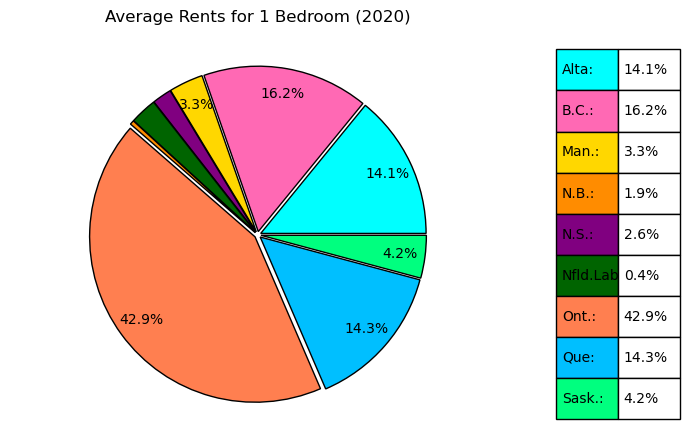

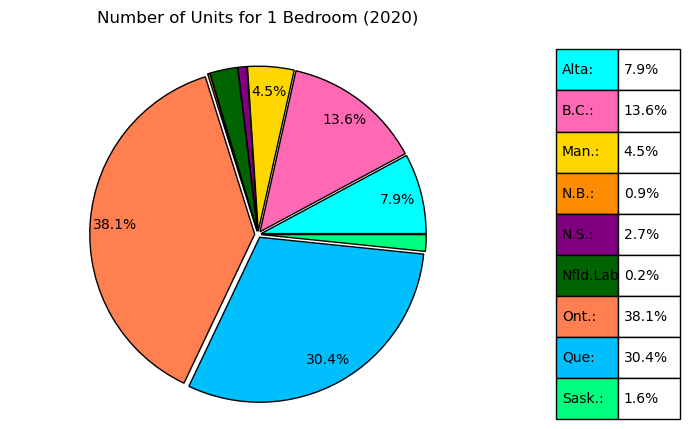

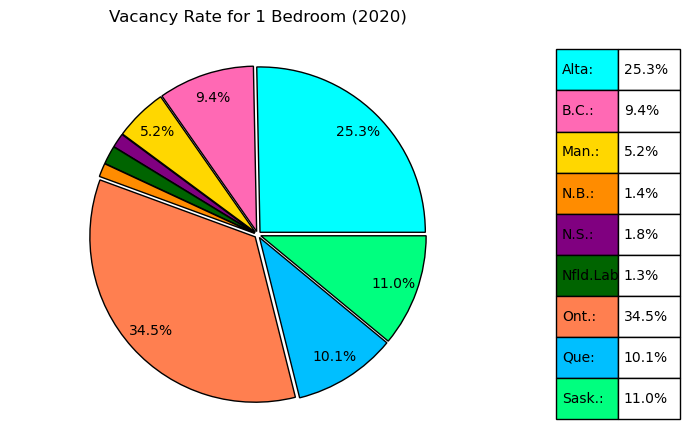

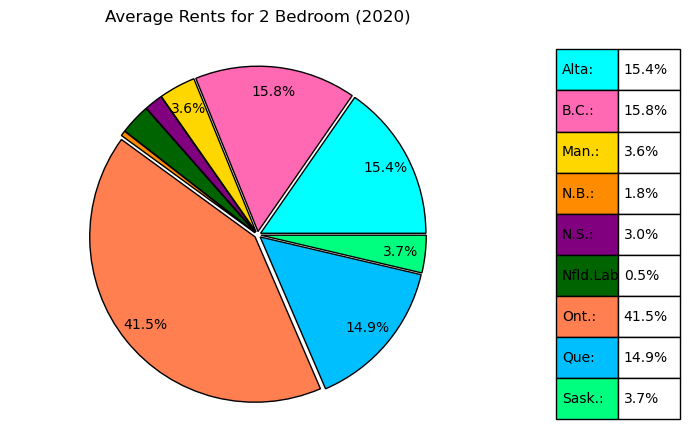

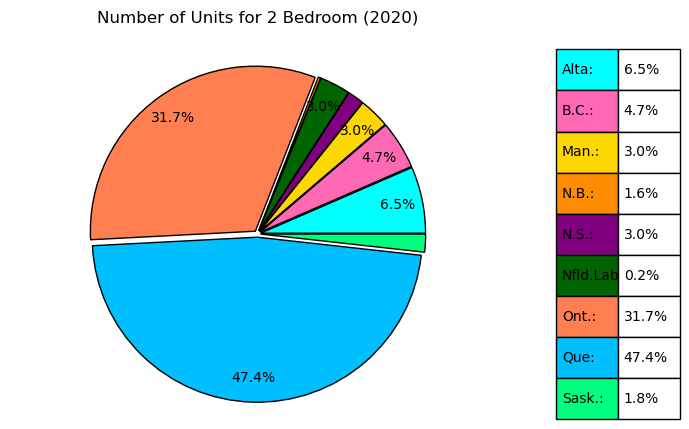

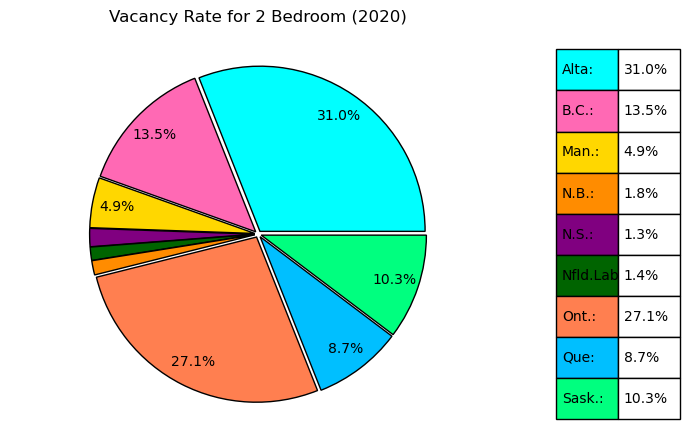

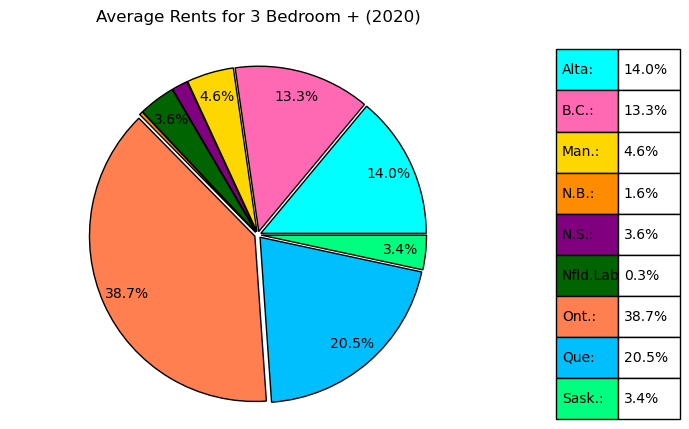

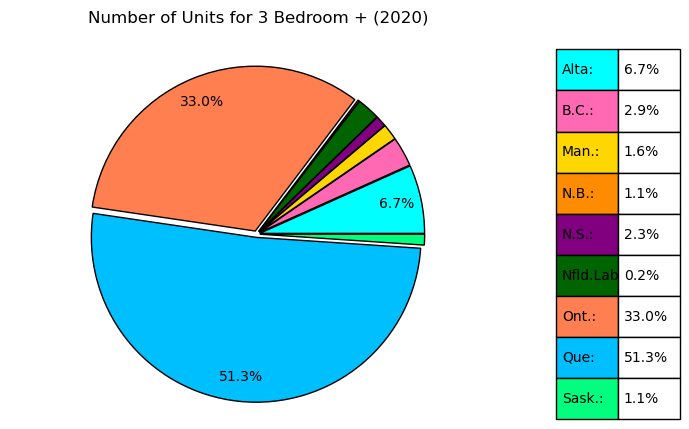

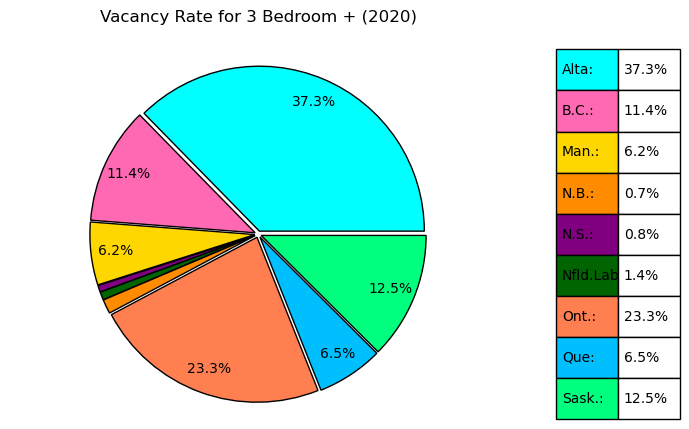

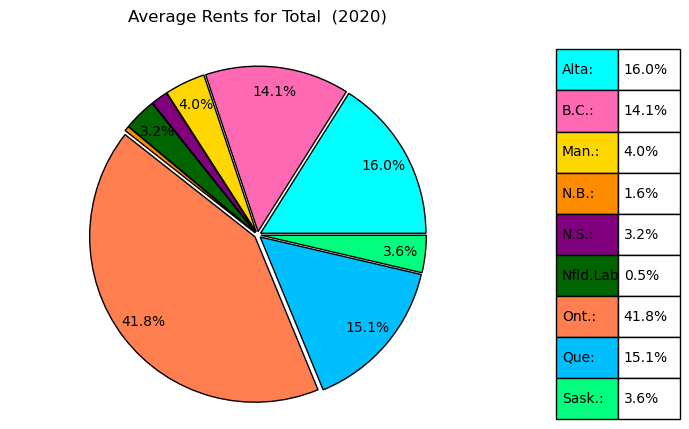

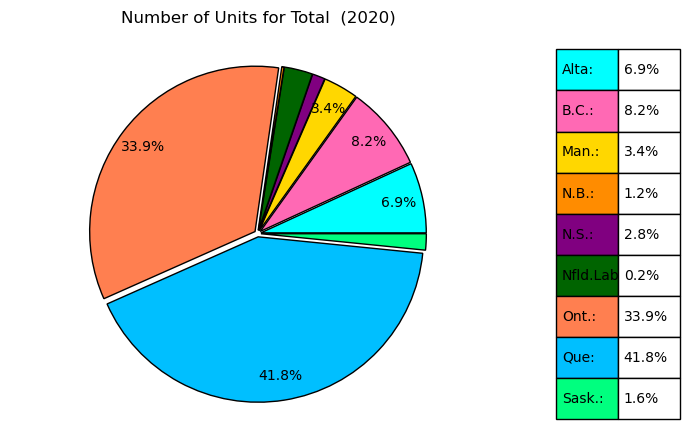

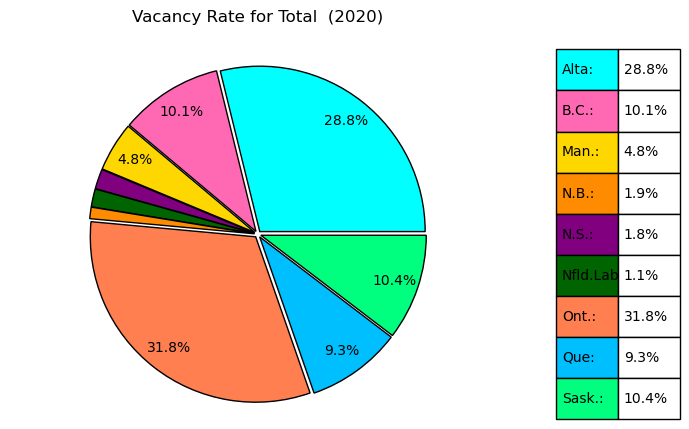

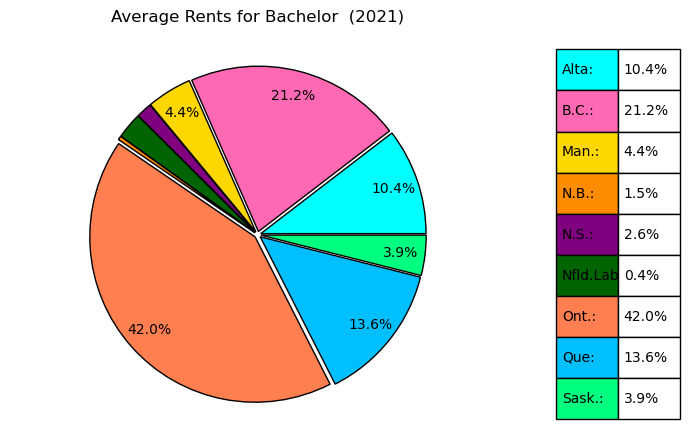

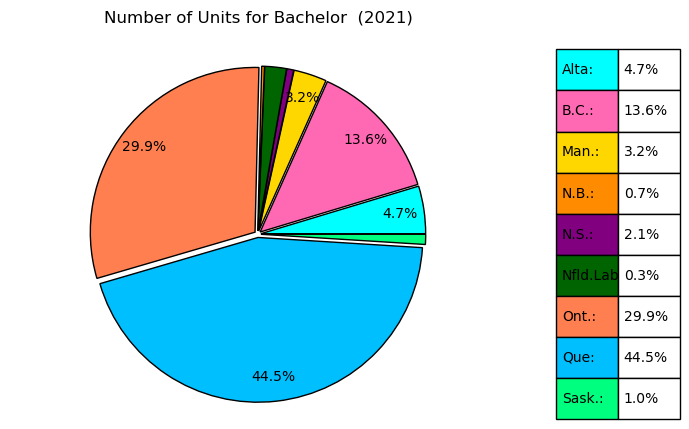

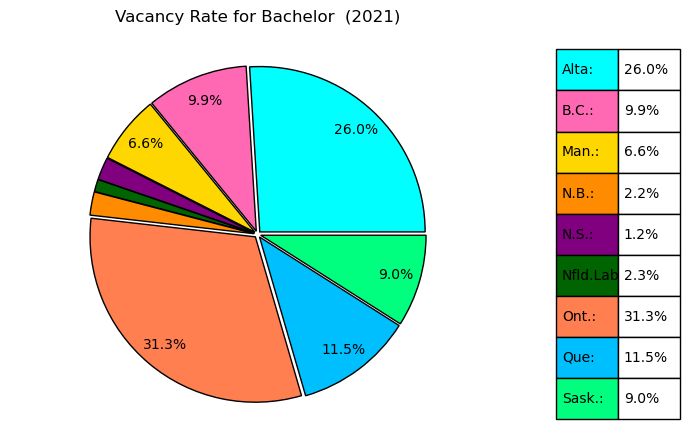

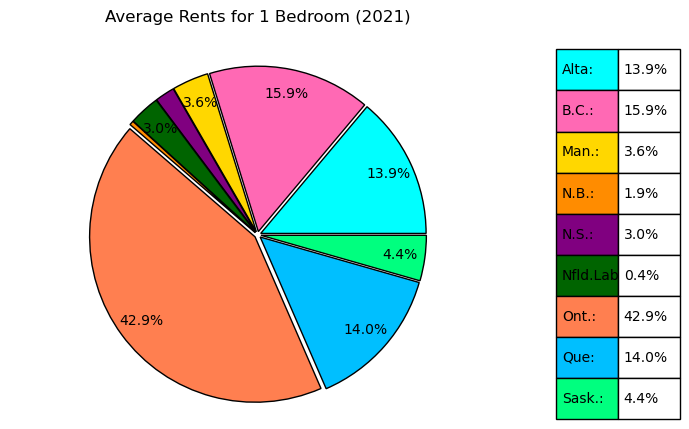

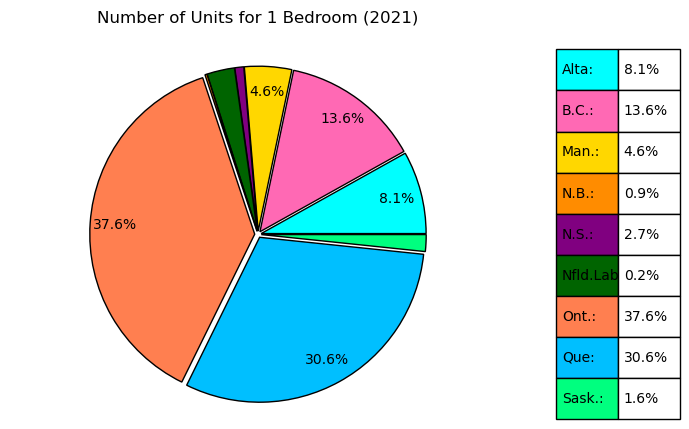

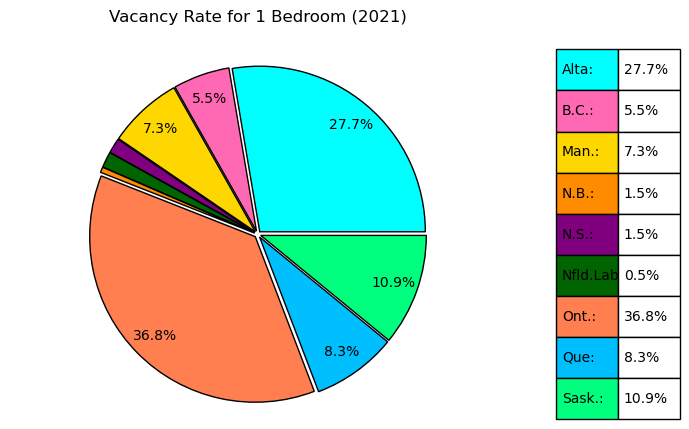

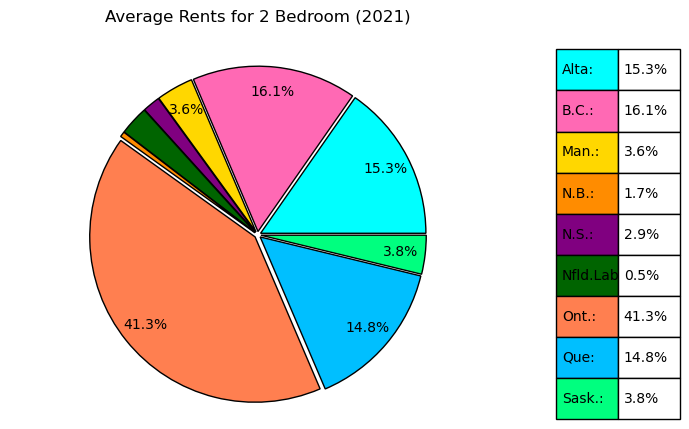

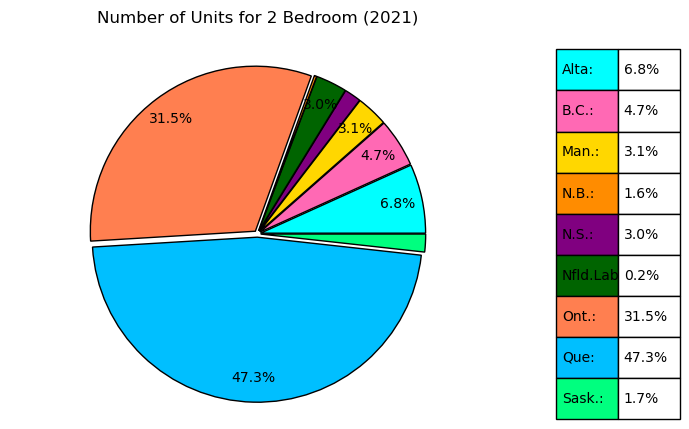

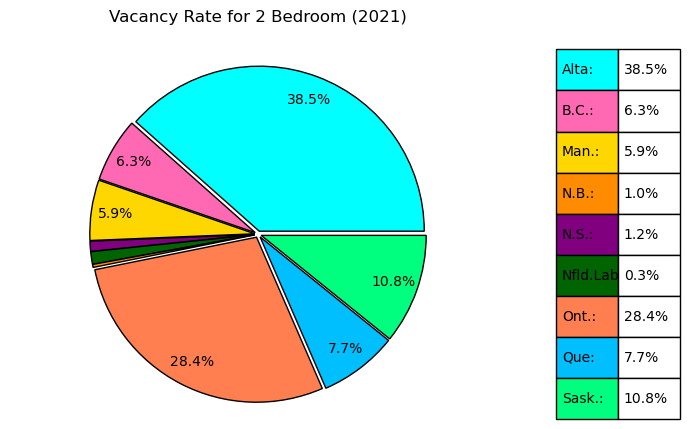

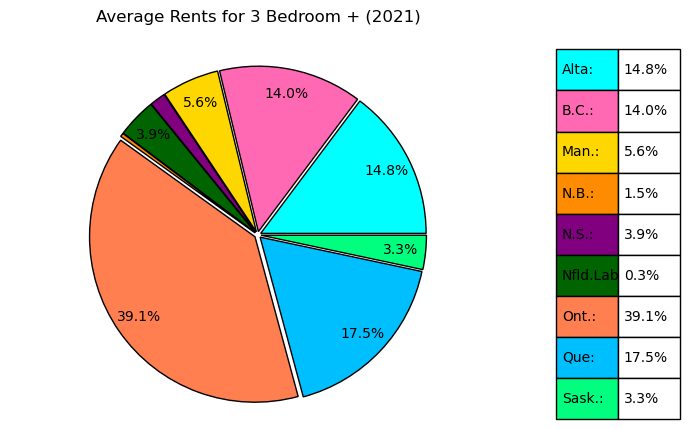

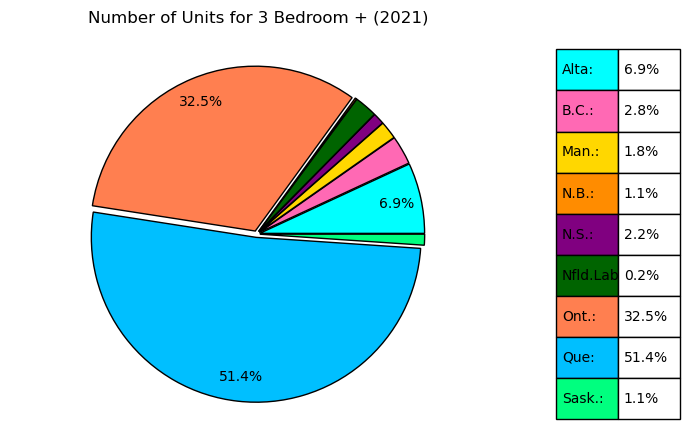

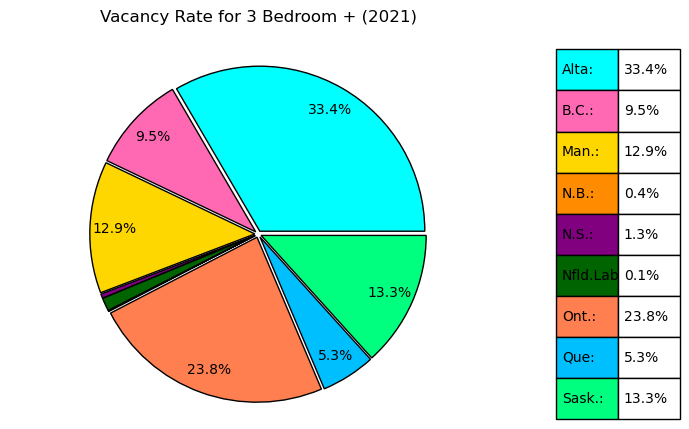

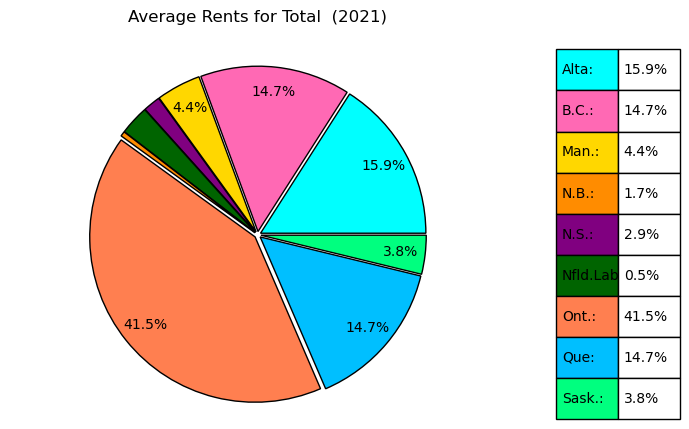

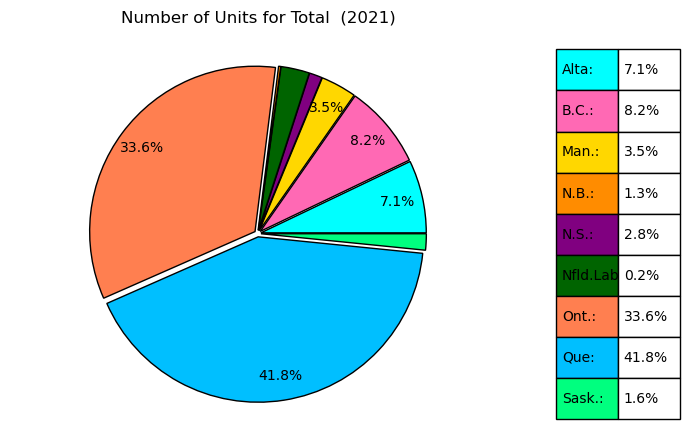

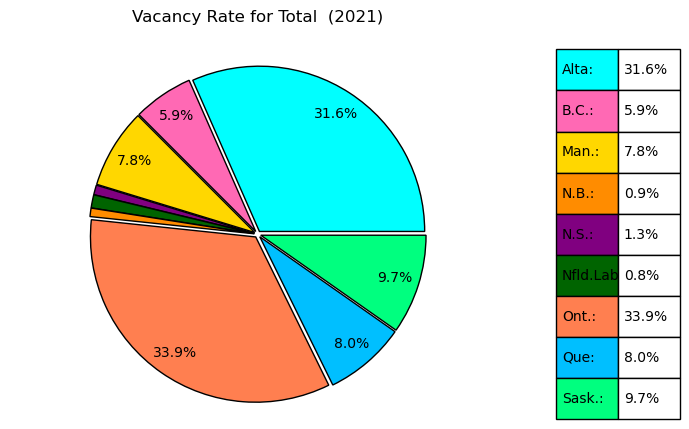

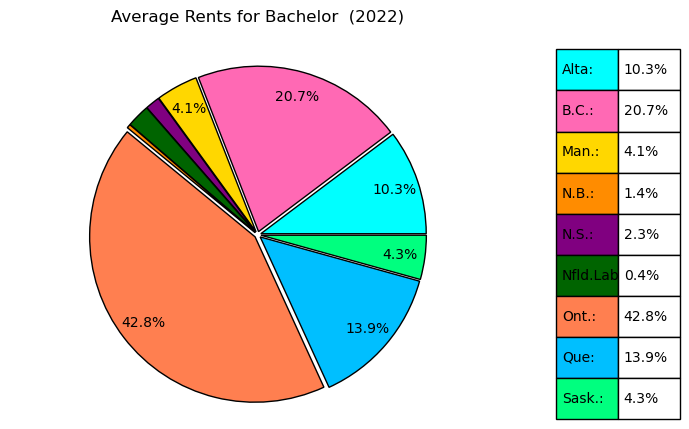

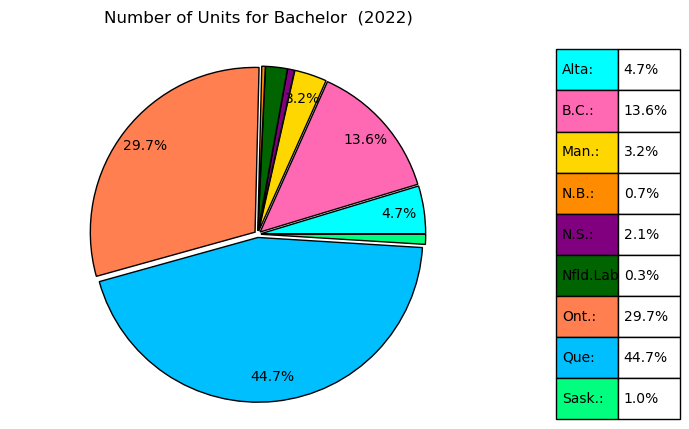

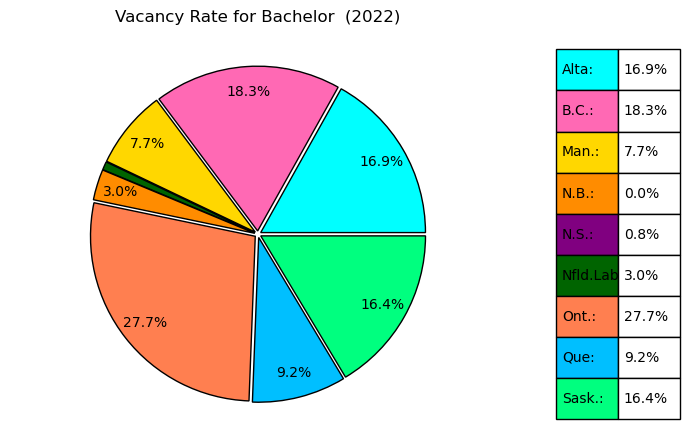

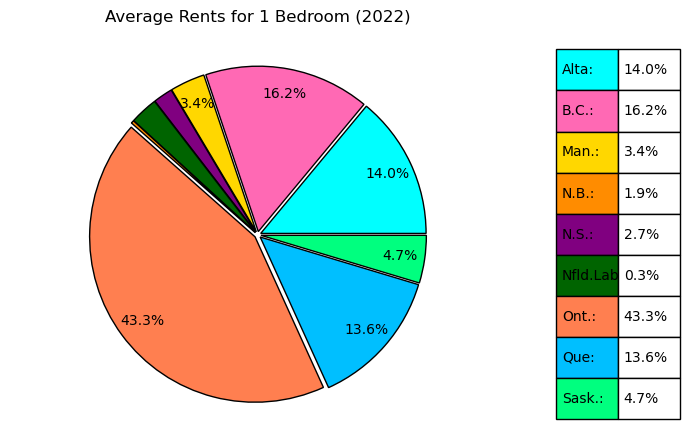

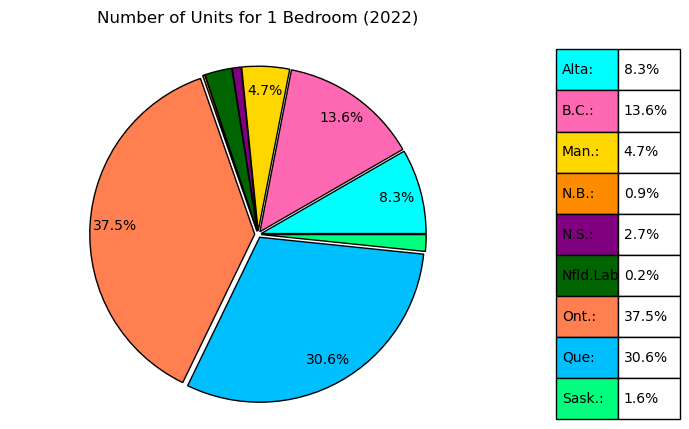

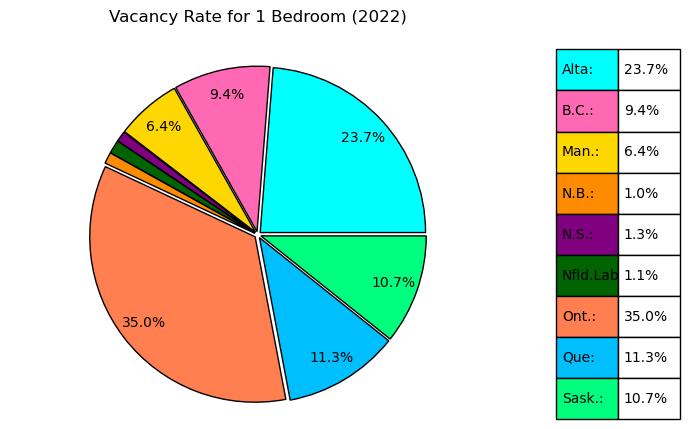

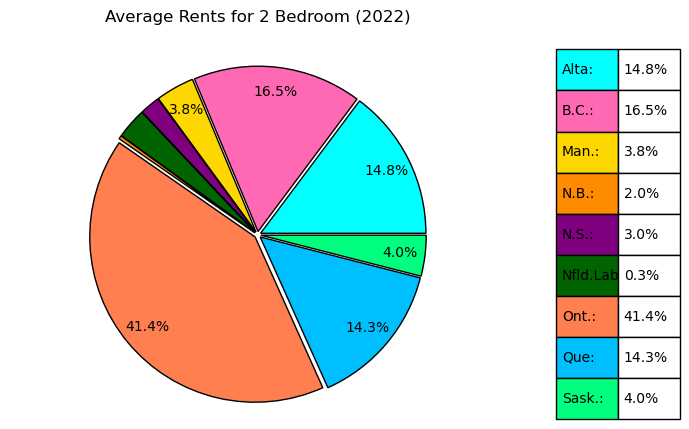

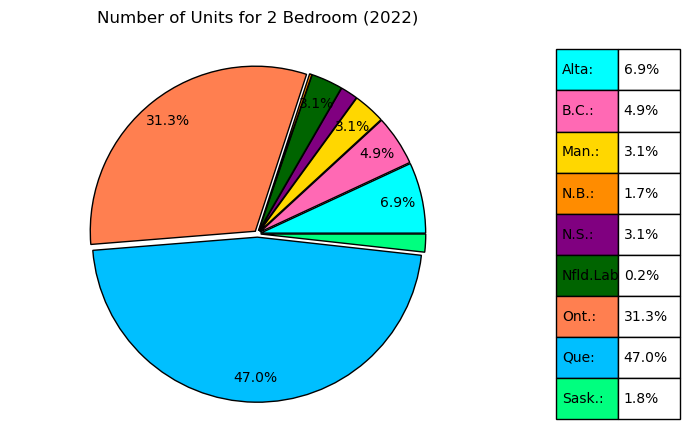

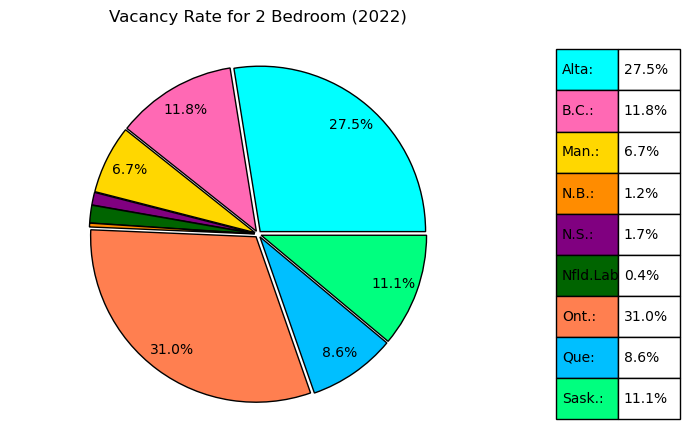

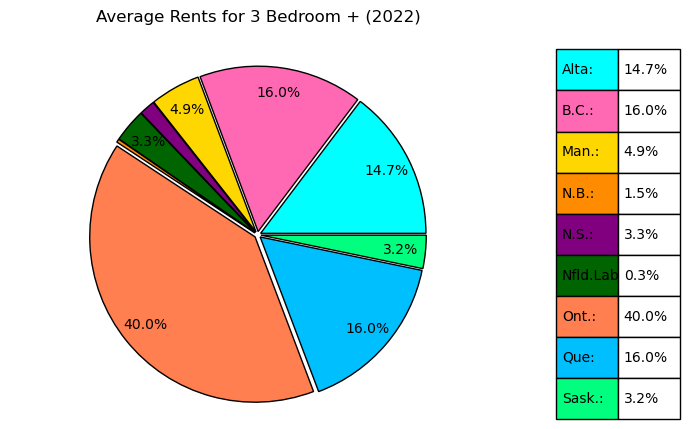

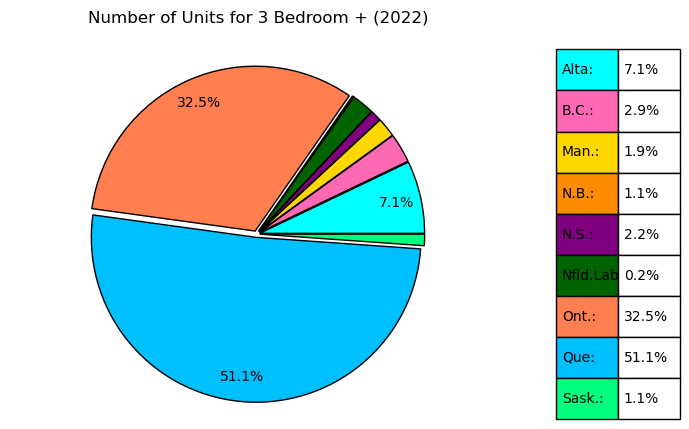

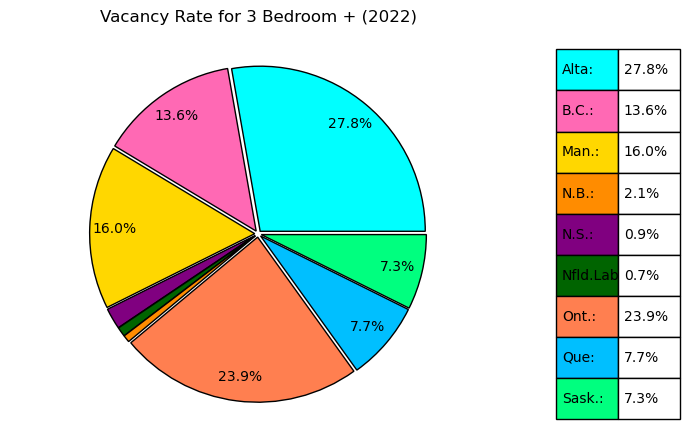

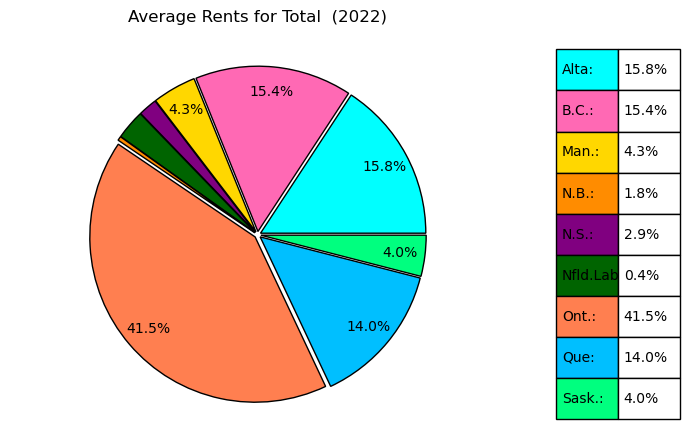

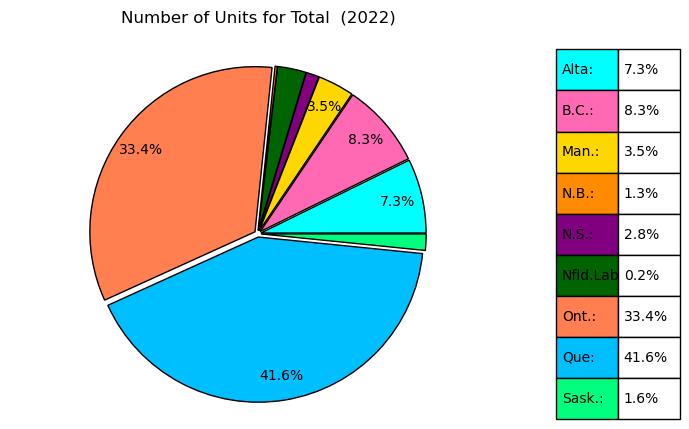

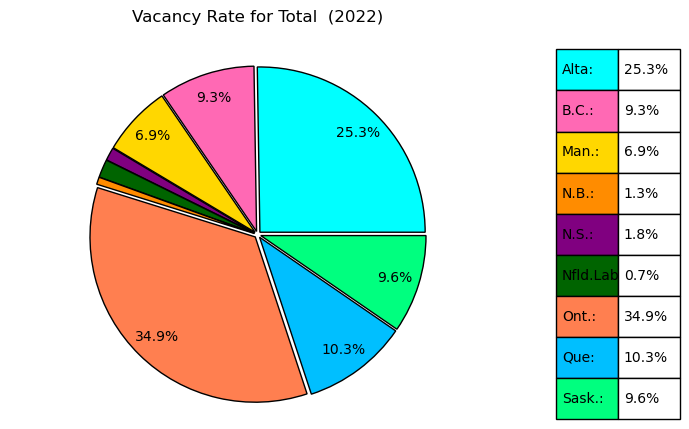

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define province colors
province_colors = {
    'Alta': 'cyan',
    'B.C.': 'hotpink',
    'Man.': 'gold',
    'Nfld.Lab.': 'darkorange',
    'N.B.': 'purple',
    'N.S.': 'darkgreen',
    'Ont.': 'coral',
    'Que': 'deepskyblue',
    'Sask.': 'springgreen'
}

# Read the CSV files
average_rents = pd.read_csv('Resources/Average Rents_Concat.csv')
number_of_units = pd.read_csv('Resources/Number_of_Units_Concat.csv')
vacancy_rate = pd.read_csv('Resources/Vacancy Rate Concat.csv')

def create_pie_chart(df, title, year, dwelling_type, province_colors):
    data = df[df['Year'] == year]
    data_by_province = data.groupby('Province')[dwelling_type].sum()
    colors = [province_colors.get(province, 'black') for province in data_by_province.index]
    fig, ax = plt.subplots()
    def autopct_hide_below_3(pct):
        return f'{pct:.1f}%' if pct > 3 else ''
    wedges, texts, autotexts = ax.pie(data_by_province, colors=colors, wedgeprops={'edgecolor': 'black', 'linewidth': 1}, autopct=autopct_hide_below_3, pctdistance=0.85, explode=[0.02]*len(data_by_province))
    ax.set_title(f'{title} for {dwelling_type} ({year})', pad=20)
    ax.axis('equal')

    # Create a label table
    label_values = [(f'{province}:', f'{p / data_by_province.sum() * 100:.1f}%') for province, p in data_by_province.items()]
    table = ax.table(cellText=label_values, cellLoc='left', colWidths=[0.1, 0.1], loc='right', bbox=[1.1, 0.0, 0.25, 1], edges='BRTL')
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    # Color province boxes
    for i, (province, color) in enumerate(province_colors.items()):
        table[(i, 0)].set_facecolor(color)

    folder = 'pie_charts'
    if not os.path.exists(folder):
        os.makedirs(folder)
    plt.savefig(os.path.join(folder, f'{title}_{dwelling_type}_{year}.png'), bbox_inches='tight')
    plt.show()

def analyze_data(year, dwelling_type, province_colors):
    create_pie_chart(average_rents, 'Average Rents', year, dwelling_type, province_colors)
    create_pie_chart(number_of_units, 'Number of Units', year, dwelling_type, province_colors)
    create_pie_chart(vacancy_rate, 'Vacancy Rate', year, dwelling_type, province_colors)

years = [2018, 2019, 2020, 2021, 2022]
dwelling_types = ['Bachelor ', '1 Bedroom', '2 Bedroom', '3 Bedroom +',"Total "]
for year in years:
    for dwelling_type in dwelling_types:
        analyze_data(year, dwelling_type, province_colors)